# Рейтинг стабильности абсолютных курсов валют

С помощью абсолютных валютных курсов исследуем стабильность мировых валют. 

Для расчета стабильности используем отношение стандартного отклонения к среднему значению за разные промежутки времени (5 лет, год, полгода, квартал и месяц).

Результаты выводим в виде столбчатых диаграмм (рейтинг). 

Так же выводим графики абсолютных курсов самых стабильных и самых нестабильных валют. Данные на них нормаированы к 100% средних значений.

Проект:	**Абсолютный курс**
	
сайт	http://www.abscur.ru

ВКонтакте	https://vk.com/abscur

FaceBook	https://www.facebook.com/abscur

WhatsUp	https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber	https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram	https://t.me/AbsCur

Одноклассники	https://ok.ru/group/53547043520717

Twitter	https://twitter.com/abscurs

GitHub	https://github.com/prog815/abscur

YouTube	https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

In [1]:
import numpy as np 
import pandas as pd
import datetime

# Загрузка абсолютных курсов

In [2]:
data = pd.read_csv('../input/abscur/close_abs.csv',index_col='Date')
data

,AUD,CAD,HKD,JPY,SEK,USD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-30,12.658865,12.762275,2.159911,0.146122,1.897793,16.763740,16.799186,17.948072,2.449642,0.664514,...,0.162345,4.146710,4.604791,3.989087,4.469973,0.475729,4.333956,0.531845,0.623303,0.000757
2017-01-31,12.657721,12.770103,2.157060,0.147182,1.897537,16.735126,16.825202,17.905600,2.432802,0.663027,...,0.162572,4.134795,4.598446,3.986452,4.467824,0.475565,4.431749,0.533356,0.626104,0.000756
2017-02-01,12.640044,12.791172,2.149692,0.147895,1.908261,16.677945,16.859094,18.009030,2.425590,0.667153,...,0.162079,4.167611,4.582860,4.006906,4.452558,0.475155,4.420926,0.532196,0.624432,0.000748
2017-02-02,12.661489,12.796239,2.152109,0.147345,1.909301,16.698480,16.811514,17.971672,2.427728,0.665624,...,0.159565,4.175873,4.588377,3.965443,4.457683,0.475605,4.427473,0.533822,0.623753,0.000738
2017-02-03,12.742345,12.775349,2.145374,0.147549,1.903408,16.647138,16.771425,17.907560,2.420560,0.662966,...,0.158998,4.152970,4.572510,3.965965,4.439000,0.474683,4.457650,0.535622,0.618393,0.000752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,13.467566,14.916730,2.406135,0.164656,2.038442,18.734600,20.529543,21.251695,2.957848,0.874121,...,0.106447,4.693303,5.146868,4.301830,4.995227,0.568836,1.394499,0.676554,0.667757,0.000828
2022-01-25,13.453191,14.893999,2.415018,0.164895,2.031168,18.804015,20.569606,21.292371,2.972482,0.867506,...,0.106841,4.668557,5.165938,4.313441,5.013602,0.569940,1.399654,0.679731,0.667944,0.000829
2022-01-26,13.460006,14.902240,2.415012,0.165069,2.032092,18.801111,20.482232,21.247106,2.973648,0.868323,...,0.106643,4.642135,5.165850,4.302510,5.018644,0.569696,1.395062,0.678789,0.661508,0.000831


# За последние 5 лет

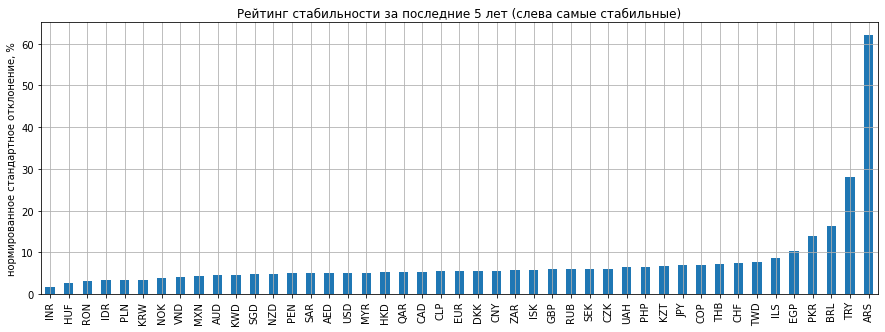

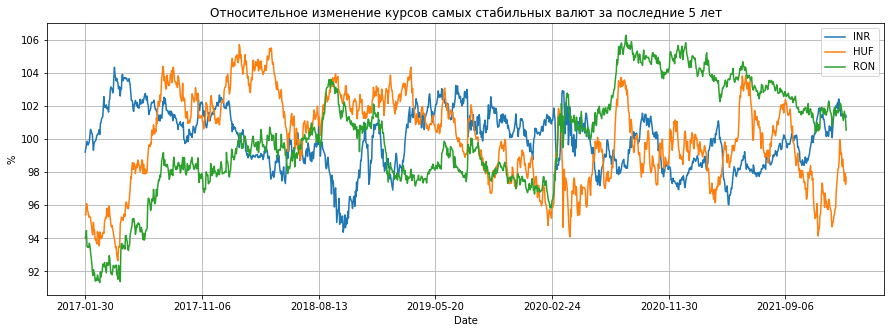

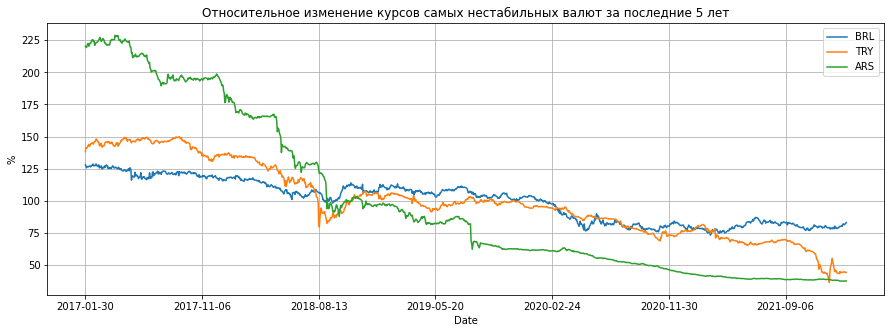

In [3]:
d = data.std()/data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг стабильности за последние 5 лет (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(data / data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последние 5 лет',ylabel='%')
_=(data / data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых нестабильных валют за последние 5 лет',ylabel='%')

# За последний год

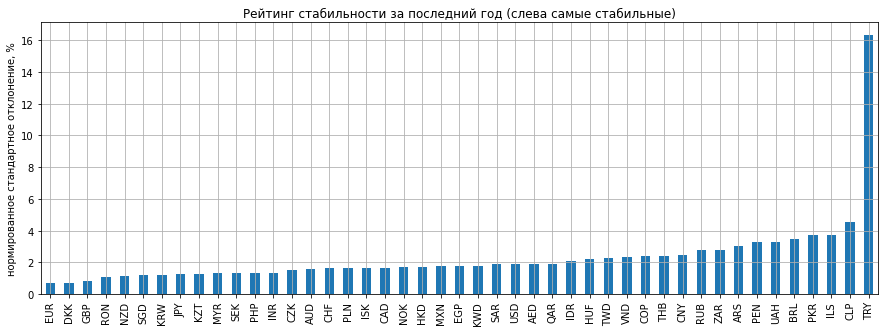

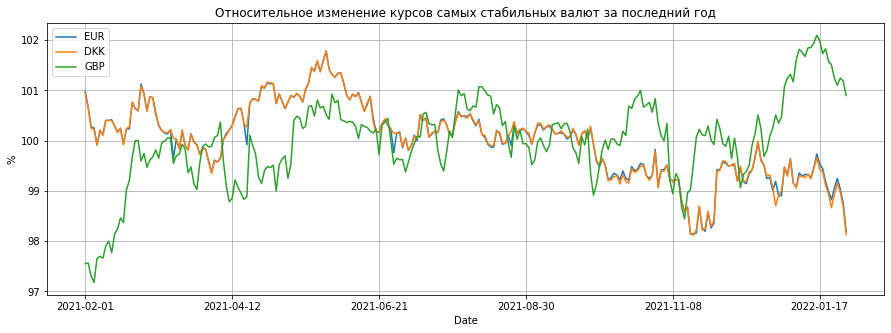

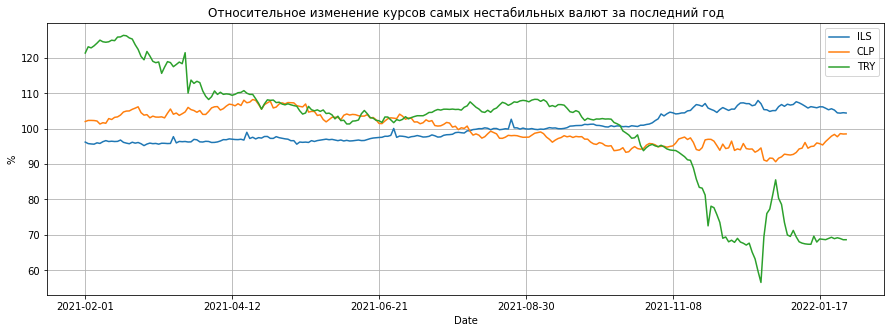

In [4]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=365))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг стабильности за последний год (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний год',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых нестабильных валют за последний год',ylabel='%')

# За последние полгода

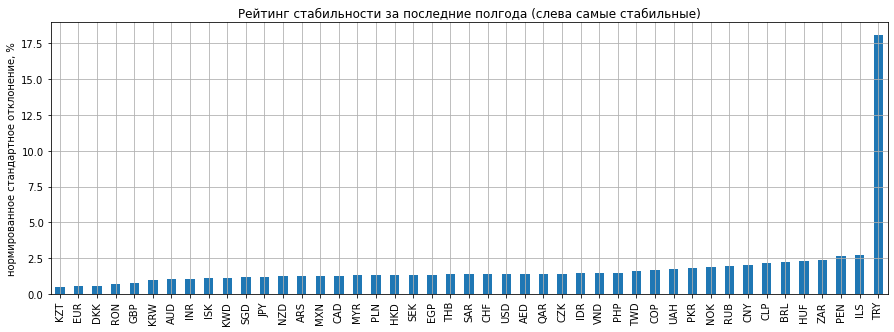

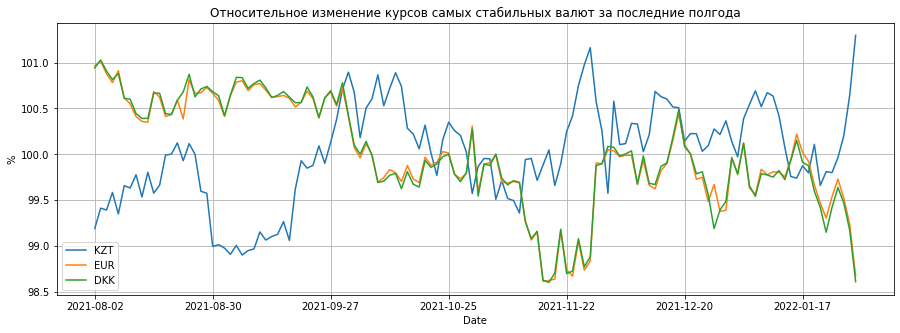

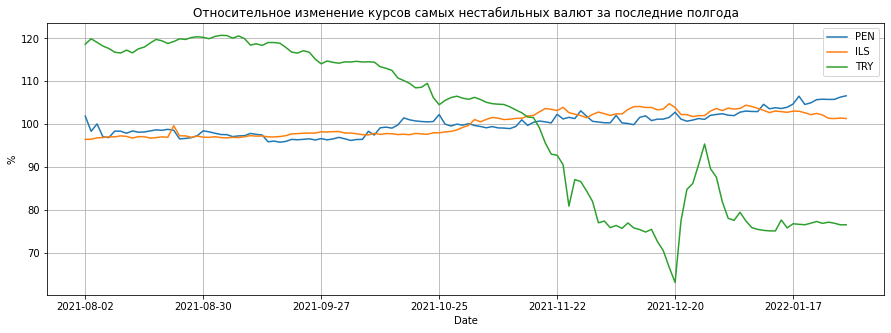

In [5]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=183))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг стабильности за последние полгода (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последние полгода',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых нестабильных валют за последние полгода',ylabel='%')

# За последний квартал

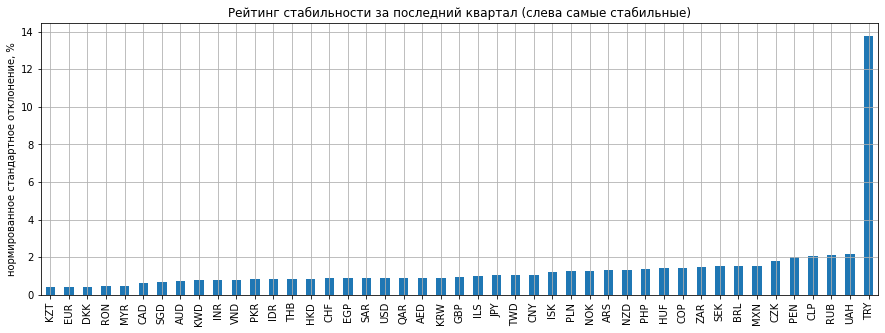

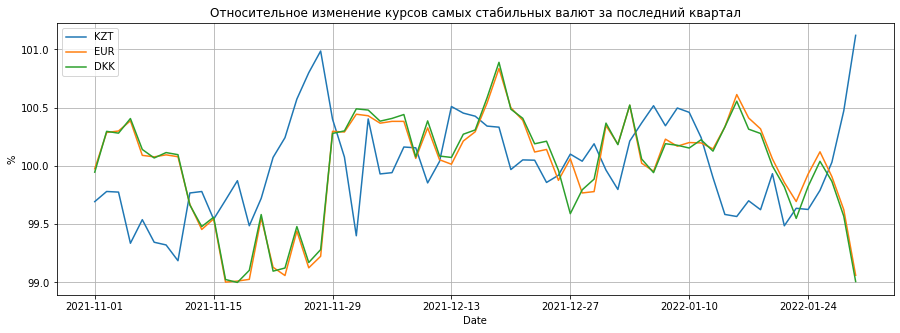

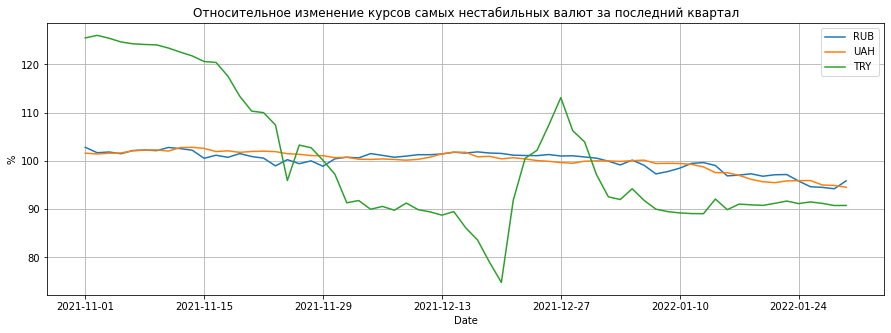

In [6]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=92))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг стабильности за последний квартал (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний квартал',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых нестабильных валют за последний квартал',ylabel='%')

# За последний месяц

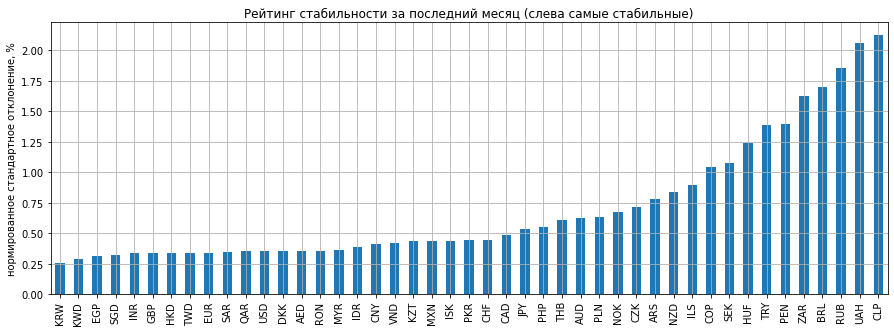

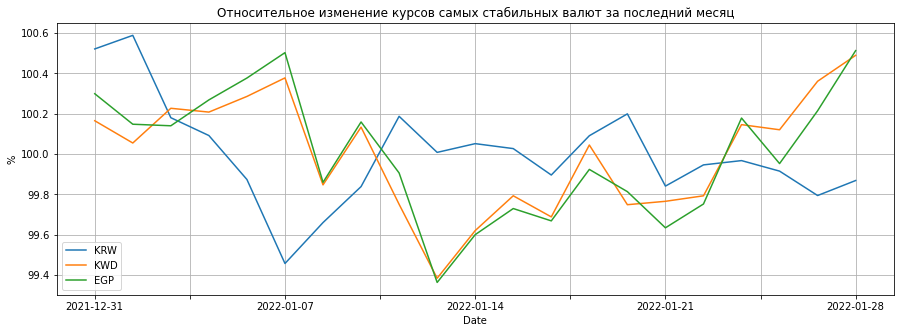

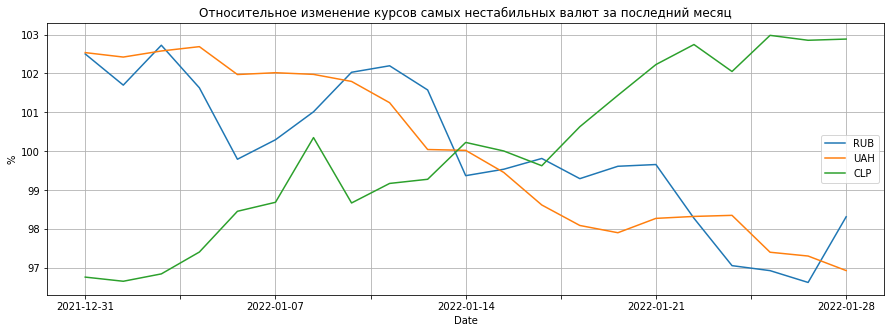

In [7]:
_data = data[data.index > str(datetime.date.today()-datetime.timedelta(days=31))]
d = _data.std()/_data.mean()
d = d.sort_values()
_=(d*100).plot.bar(grid=True,figsize=(15,5),title='Рейтинг стабильности за последний месяц (слева самые стабильные)',ylabel='нормированное стандартное отклонение, %')
_=(_data / _data.mean()*100)[d.index[:3]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых стабильных валют за последний месяц',ylabel='%')
_=(_data / _data.mean()*100)[d.index[-3:]].plot(grid=True,figsize=(15,5),title='Относительное изменение курсов самых нестабильных валют за последний месяц',ylabel='%')